# Data Preparation
The variable x_train contains 3 EEG channels, 140 trials with 9 seconds each. Each trial has 1152 units of data. Thus, each second in a trial produces 128 units of signal data. The variable y_train contains the classlabels ‘1’, ‘2’ for left and right, respectively. x_test contains another set of 140 trials. The cue was presented from t = 3s to 9s. At the same time, the feedback was presented to the subject. Within this period, it should be possible to distinguish the two types of trials. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ThakdanaiSaelee/CE903_group_project/main/dataset/x_train.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,410,411,412,413,414,415,416,417,418,419
0,0.010254,0.081055,0.062500,-0.091797,-0.057617,-0.084473,0.056641,0.061523,0.039062,-0.125490,...,0.019531,0.045410,0.035156,0.070312,0.023926,-0.050293,-0.012207,0.041504,0.044434,0.095703
1,-0.023926,0.076172,0.034180,-0.080078,-0.026367,-0.105960,0.009277,0.041992,0.031738,-0.114260,...,0.134770,0.116210,0.073730,0.084473,0.007812,-0.053711,-0.034668,0.063965,0.070801,0.067871
2,-0.009766,0.077637,0.065918,-0.073730,0.004883,-0.086426,-0.078613,0.015625,0.012695,-0.109860,...,0.162110,0.135740,0.081543,0.042480,0.040527,0.019043,-0.011719,0.050781,0.050293,-0.002441
3,0.048828,0.112300,0.123050,-0.067871,-0.020996,-0.076172,-0.157230,-0.002930,-0.024902,-0.101070,...,0.160640,0.101560,0.058594,0.003906,0.104980,0.063477,-0.006348,0.053223,0.066895,-0.007812
4,-0.038086,0.037109,0.066895,-0.092773,-0.029297,-0.067871,-0.153320,-0.011230,-0.027344,-0.097168,...,0.144040,0.063965,0.061035,-0.001465,0.103030,0.086914,0.011719,0.042480,0.098633,0.025391


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Columns: 420 entries, 0 to 419
dtypes: float64(420)
memory usage: 3.7 MB


In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,410,411,412,413,414,415,416,417,418,419
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,...,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,-0.001096,-0.000807,-0.001366,-0.003607,-0.004327,-0.003292,0.001268,0.000935,0.000061,0.001479,...,-0.000958,-0.000747,0.002211,0.000488,0.001813,0.002936,0.001481,-0.000760,0.003910,0.000398
std,0.063368,0.069890,0.067713,0.067318,0.066974,0.075070,0.092757,0.073431,0.066523,0.059947,...,0.125157,0.117597,0.150653,0.121240,0.076571,0.081800,0.089683,0.121255,0.104085,0.087604
min,-0.181150,-0.219730,-0.252440,-0.258300,-0.268550,-0.351070,-0.291990,-0.228520,-0.241210,-0.225590,...,-0.497560,-0.540040,-0.437500,-0.452640,-0.271970,-0.210940,-0.329100,-0.393070,-0.354490,-0.299800
25%,-0.041138,-0.047485,-0.047852,-0.046387,-0.049316,-0.047363,-0.056152,-0.046997,-0.041504,-0.038574,...,-0.078735,-0.066895,-0.088989,-0.066040,-0.043945,-0.055664,-0.048340,-0.077759,-0.062500,-0.052856
50%,-0.003418,-0.000732,-0.002441,-0.004150,-0.002197,-0.001953,0.003174,0.003174,0.002197,0.000977,...,0.008789,0.011963,0.000244,0.008545,0.004150,0.001221,0.003662,0.007812,0.003906,0.004639
75%,0.041626,0.042114,0.046020,0.039551,0.039184,0.046020,0.065918,0.050781,0.044434,0.042602,...,0.079102,0.077270,0.091309,0.083008,0.053345,0.061523,0.062012,0.091919,0.070801,0.058594
max,0.225590,0.245610,0.215330,0.279790,0.250490,0.264160,0.234380,0.209960,0.196780,0.205080,...,0.377440,0.378420,0.629390,0.382320,0.267090,0.256840,0.237790,0.285160,0.297850,0.263180


In [5]:
rows_to_drop = []
for i in range(256):
    rows_to_drop.append(i)
data = data.drop(labels = rows_to_drop, axis = 0) # Removing the first two seconds from all trials

In [6]:
data = data.values
sensor1 = np.zeros((896,140))
sensor2 = np.zeros((896,140))
sensor3 = np.zeros((896,140))
column = 0
column2 = 0
column3 = 0
for i in range(420):
    if i<140:
        sensor1[:,column] = data[:,i]
        column += 1
    elif i>=140 and i<280:
        sensor2[:,column2] = data[:,i]
        column2 += 1
    elif i>=280 and i<420:
        sensor3[:,column3] = data[:,i]
        column3 += 1
sensor1 = sensor1.T
sensor2 = sensor2.T
sensor3 = sensor3.T

In [7]:
sensor1.shape

(140, 896)

In [8]:
sensor2.shape

(140, 896)

In [9]:
sensor3.shape

(140, 896)

In [10]:
print(sensor1)

[[-0.16064    -0.12695    -0.059082   ...  0.1084      0.17334
   0.22559   ]
 [-0.063477   -0.074707    0.0073242  ...  0.13135     0.18359
   0.24561   ]
 [-0.23193    -0.25244    -0.20996    ...  0.064941    0.10449
   0.12939   ]
 ...
 [ 0.13867     0.10938     0.054688   ...  0.037109    0.046875
   0.037598  ]
 [-0.043457   -0.033691   -0.003418   ...  0.076172    0.056152
   0.019531  ]
 [-0.020508    0.029297    0.034668   ...  0.018066    0.026855
  -0.00048828]]


In [11]:
print(sensor2)

[[-0.037109   -0.011719   -0.0048828  ...  0.038086    0.01416
  -0.0097656 ]
 [-0.027832   -0.09082    -0.12695    ...  0.079102   -0.0087891
  -0.024414  ]
 [-0.066895   -0.11182    -0.13184    ... -0.00097656 -0.045898
  -0.052246  ]
 ...
 [ 0.02002     0.16357     0.20557    ...  0.08252     0.060547
  -0.026855  ]
 [ 0.054199    0.18018     0.22949    ...  0.062988    0.10449
   0.086914  ]
 [ 0.049805    0.11035     0.14014    ... -0.11865    -0.054199
  -0.0048828 ]]


In [12]:
print(sensor3)

[[ 0.086914    0.10889     0.09375    ... -0.15283    -0.063477
  -0.04834   ]
 [ 0.019531    0.036133    0.068359   ... -0.057129   -0.043945
  -0.085449  ]
 [ 0.064453    0.052246    0.029785   ... -0.067871   -0.13965
  -0.19727   ]
 ...
 [ 0.050781    0.13428     0.21582    ...  0.098145    0.18311
   0.18652   ]
 [-0.046387    0.039062    0.16797    ...  0.0048828   0.1582
   0.1582    ]
 [ 0.00048828  0.045898    0.13477    ... -0.016113    0.092285
   0.13379   ]]


In [13]:
sensor = np.stack((sensor1, sensor3), axis = 1)
sensor = sensor.reshape((2,140,896))
sensor = sensor.reshape(sensor.shape[0], (sensor.shape[1] * sensor.shape[2]))
sensor.shape

(2, 125440)

In [14]:
ch_names = ['C3', 'C4']

# Converting data to signals
We are converting the data which is present in the form of a .csv file into a raw signal data for the ease of processing, feature extraction and feature selection.

In [18]:
!pip install mne
!pip install PyQt5

  Using cached PyQt5-5.15.6-cp36-abi3-manylinux1_x86_64.whl (8.3 MB)
  Using cached PyQt5_sip-12.9.1-cp37-cp37m-manylinux1_x86_64.whl (338 kB)
     |████████████████████████████████| 59.9 MB 1.1 MB/s 


In [19]:
from mne.io import RawArray
import mne
import matplotlib
import PyQt5
info_sensor = mne.create_info(ch_names = ch_names, sfreq = 128, ch_types=['eeg']*2) #The no. of trials are 140 and each trial is sampled at 128 Hz. Hence, sfreq = 128.
raw = RawArray(sensor, info = info_sensor)
#raw.plot(show_scrollbars=True, show_scalebars=True)

Creating RawArray with float64 data, n_channels=2, n_times=125440
    Range : 0 ... 125439 =      0.000 ...   979.992 secs
Ready.


# Checking for bad channels

Not setting metadata
Not setting metadata
140 matching events found
No baseline correction applied
0 projection items activated


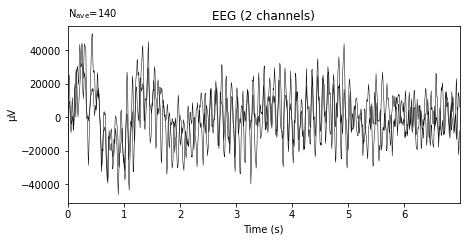

In [20]:
raw2 = raw.copy()
raw2.info['bads'] = []
epochs2 = mne.make_fixed_length_epochs(raw, duration = 7).average().plot()

From the above figure, we can visualize that there are no bad channels among the 3 channels.

# Applying Low-Pass filter

Effective window size : 16.000 (s)


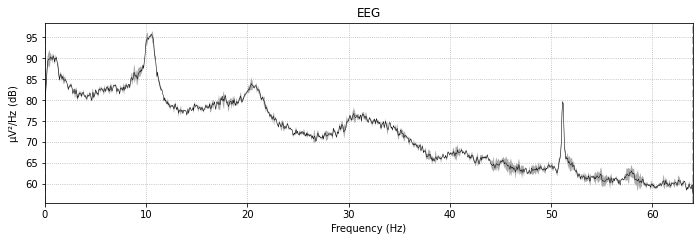

Text(0.5, 0.98, 'UnFiltered Cz')

In [21]:
fig = raw.plot_psd(fmax=64, average=True) # Visualizing Power-Line Noise in channel Cz
fig.subplots_adjust(top=0.85)
fig.suptitle('UnFiltered Cz', size='xx-large', weight='bold')

From the above figure, we can visualize that Power-Line noise exists at 1, 10.5, 20 and 51 Hz.

In [22]:
raw = raw.copy().filter(l_freq=None, h_freq=40)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 43 samples (0.336 sec)



# Filtering Slow-Drifts in data using High-Pass Filter

In [23]:
raw = raw.copy().filter(l_freq = 1., h_freq=None) #filtering slow drifts from data

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 423 samples (3.305 sec)



In [24]:
raw.set_montage(mne.channels.make_standard_montage('standard_alphabetic', head_size=0.095)) # Specifying the montage for digitized points visualization.

<RawArray | 2 x 125440 (980.0 s), ~1.9 MB, data loaded>

# Repairing artifacts in data using ICA (Independent Component Analysis)

Fitting ICA to data using 2 channels (please be patient, this may take a while)
Selecting by number: 2 components
Fitting ICA took 0.6s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
490 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
490 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


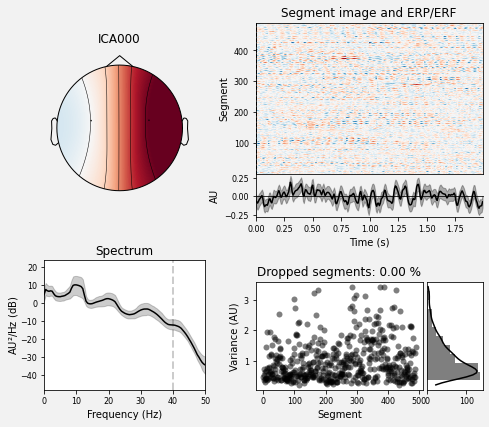

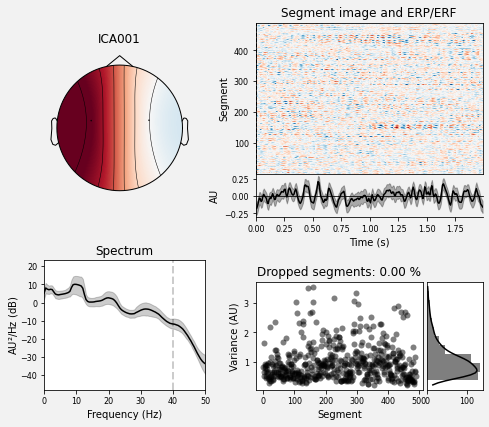

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [25]:
from mne.preprocessing import ICA, create_ecg_epochs
ica = mne.preprocessing.ICA(n_components = 2, random_state = 97, max_iter = 'auto')
ica.fit(raw)
ica.plot_properties(raw)

In [26]:
ica.apply(raw)

Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroing out 0 ICA components
    Projecting back using 2 PCA components


<RawArray | 2 x 125440 (980.0 s), ~1.9 MB, data loaded>

In [27]:
epochs =  mne.make_fixed_length_epochs(raw, duration = 7, preload = True) # Dividing raw into epoch components
data = epochs.get_data()
print(data.shape)

Not setting metadata
Not setting metadata
140 matching events found
No baseline correction applied
0 projection items activated
Loading data for 140 events and 896 original time points ...
0 bad epochs dropped
(140, 2, 896)


# Averaging data over epochs (trials)

No projector specified for this dataset. Please consider the method self.add_proj.


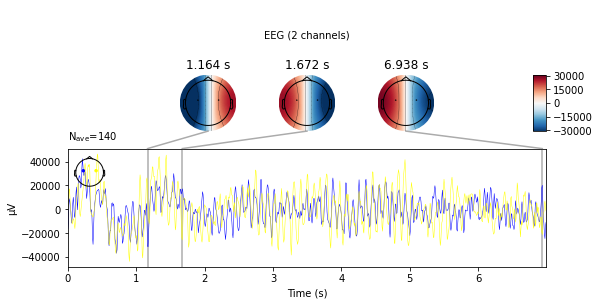

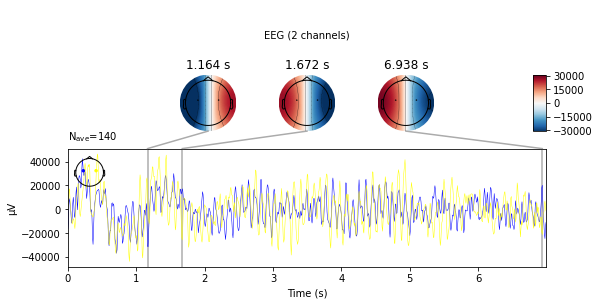

In [28]:
evoked = epochs.average()
evoked.plot_joint()

    Using multitaper spectrum estimation with 7 DPSS windows


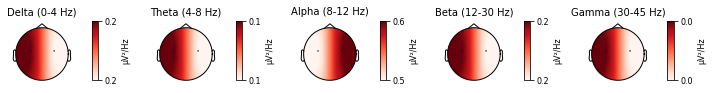

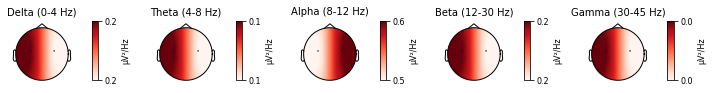

In [29]:
from matplotlib import cm
epochs.plot_psd_topomap(ch_type='eeg', normalize=True)

Applying baseline correction (mode: logratio)


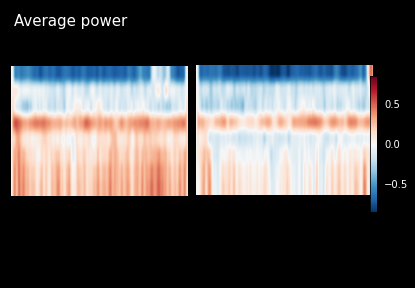

Applying baseline correction (mode: logratio)


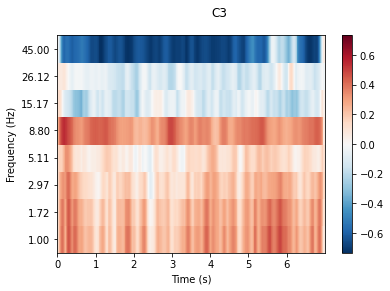

Applying baseline correction (mode: logratio)


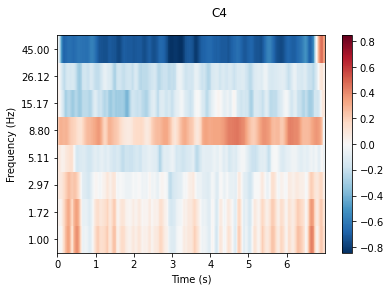

<Figure size 432x288 with 0 Axes>

In [30]:
from mne.time_frequency import tfr_morlet
freqs = np.logspace(*np.log10([1, 45]), num=8)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)
power.plot_topo(baseline=(-0.5, 0), mode='logratio', title='Average power')
power.plot([0], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[0])
power.plot([1], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[1])
mne.viz.tight_layout()

# Converting Epochs to data for processing in Machine Learning

In [31]:
data = epochs.get_data()
print(data.shape)

(140, 2, 896)


In [32]:
output_data = pd.read_csv('https://raw.githubusercontent.com/ThakdanaiSaelee/CE903_group_project/main/dataset/y_train.csv', header=None)
output_data = np.array(output_data.loc[:,0].tolist())
print(output_data)

[1 2 2 2 2 1 1 2 2 1 1 2 1 2 2 2 2 1 1 1 1 2 1 2 1 2 2 2 2 1 1 2 1 2 1 1 1
 1 1 2 2 2 2 1 1 2 1 2 2 1 2 2 2 1 2 2 1 2 2 1 2 1 2 1 2 2 2 2 2 1 2 1 2 1
 1 1 1 2 1 2 1 2 2 1 1 1 2 1 1 1 1 1 1 2 2 1 2 1 1 1 2 2 2 1 2 2 2 1 1 2 2
 2 1 1 2 1 1 1 2 1 2 1 1 1 2 2 1 2 1 2 1 1 2 1 1 2 1 2 2 1]


# Feature Extraction

In [ ]:
from mne_features.feature_extraction import extract_features
selected_funcs = ['app_entropy', 'time_corr'] #Using the following features for applying onto gridSearchCV
selected_funcs2 = {'app_entropy', 'quantile', 'time_corr', 'mean'}
X_new =  extract_features(data, 128, selected_funcs2)

# Training epochs into Machine Learning models

In [34]:
!pip install scikit-learn==1.0
!pip install mne_features

     |████████████████████████████████| 23.1 MB 55.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


     |████████████████████████████████| 40 kB 3.9 MB/s 
  Created wheel for mne-features: filename=mne_features-0.2-py3-none-any.whl size=26760 sha256=c1deb57612e001d9987abbda9bf5567b3e1c2069624febbe173bed215e37c1b3
  Stored in directory: /root/.cache/pip/wheels/50/7d/94/905a24736d6d8ecd07fb249d02af5391afed5054d26a0b66b8
Successfully built mne-features


In [35]:
from mne_features.feature_extraction import extract_features, FeatureExtractor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [36]:
def best_score(answer):
  best_score = 0
  index = 0
  for position, score in enumerate(answer):
    if score[2] > best_score:
      best_score = score[2]
      index = position

  print('best_feature:', answer[index][0])
  print('best_score:', answer[index][2])

##### 1. Logistic Regression

In [54]:
def logistic(X_new):
  pipe = Pipeline([('scaler', StandardScaler()),
                  ('lr', LogisticRegression(random_state=42))]) 
  kf = KFold(n_splits=2, shuffle=True, random_state=4)
  scores = cross_val_score(pipe, X_new, output_data, scoring='accuracy', cv=kf)

  param_grid = {'lr__penalty':['l2'], 'lr__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
  gs = GridSearchCV(pipe,param_grid, cv=kf, n_jobs = 1, return_train_score=True)
  gs.fit(X_new,output_data)
  # print("Parameters: "+ str(lr.best_params_))
  # print("Esimaster: "+ str(lr.best_estimator_))
  # print("Score: " + str(lr.best_score_))
  return gs.best_estimator_, gs.best_score_

In [55]:
feature = ['mean','std','ptp_amp','rms','quantile','time_corr','max_cross_corr','app_entropy']
answer = []
for i in range(len(feature)-1):
  for j in range(i+1, len(feature)):
    selected_funcs = {feature[i],feature[j]}
    X_new = extract_features(data, 128, selected_funcs)
    estimator, score = logistic(X_new)
    features = [feature[i],feature[j]]
    answer.append([features,estimator,score])

In [56]:
best_score(answer)

best_feature: ['std', 'app_entropy']
best_score: 0.6071428571428572


##### 2. Random Forest

In [65]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier

def random(X_new):
  rf = RandomForestClassifier(criterion='entropy',random_state=0)
  param_grid = {'n_estimators':[600],'max_depth': np.arange(11,12)}
  #'max_depth': np.arange(4,19),'min_samples_split': np.arange(4,19),'min_samples_leaf': np.arange(4,25)}

  rf = GridSearchCV(rf, param_grid,cv=10,n_jobs=-1)
  rf.fit(X_new,output_data)

  return rf.best_estimator_, rf.best_score_

In [66]:
answer_random = []
for i in range(len(feature)-1):
  for j in range(i+1, len(feature)):
    selected_funcs = {feature[i],feature[j]}
    X_new = extract_features(data, 128, selected_funcs)
    estimator, score = random(X_new)
    features = [feature[i],feature[j]]
    answer_random.append([features,estimator,score])

In [67]:
best_score(answer_random)

best_feature: ['quantile', 'app_entropy']
best_score: 0.6285714285714286


##### Gradient Boosting

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate

def gradient(X_new):
  pipe = Pipeline([('scaler', StandardScaler()),
                  ('xgb', GradientBoostingClassifier(random_state=1))]) 
  kf = KFold(n_splits=2, shuffle=True, random_state=4)
  params_grid = {'xgb__criterion':['friedman_mse', 'squared_error'],'xgb__loss':['deviance','exponential']}
  gs = GridSearchCV(pipe,params_grid, cv=kf, n_jobs = -1, return_train_score=True)
  gs.fit(X_new,output_data)
  return gs.best_estimator_, gs.best_score_

In [93]:
answer_gradient = []
for i in range(len(feature)-1):
  for j in range(i+1, len(feature)):
    selected_funcs = {feature[i],feature[j]}
    X_new = extract_features(data, 128, selected_funcs)
    estimator, score = gradient(X_new)
    features = [feature[i],feature[j]]
    answer_gradient.append([features,estimator,score])

In [94]:
best_score(answer_gradient)

best_feature: ['quantile', 'app_entropy']
best_score: 0.6357142857142857


In [ ]:
from sklearn.model_selection import GridSearchCV
params_grid = {'fe__app_entropy__emb':np.arange(2,12)}
kf = KFold(n_splits=2, shuffle=True, random_state=4)
gs = GridSearchCV(estimator=pipe, param_grid = params_grid, cv=kf, n_jobs = 1, return_train_score=True)
gs.fit(data,output_data)
gs.fit(data, output_data)

print(gs.best_params_)

{'fe__app_entropy__emb': 2}


In [ ]:
scores = pd.DataFrame(gs.cv_results_)
print(scores[['params', 'mean_test_score', 'mean_train_score']])

                         params  mean_test_score  mean_train_score
0   {'fe__app_entropy__emb': 2}         0.607143          1.000000
1   {'fe__app_entropy__emb': 3}         0.528571          1.000000
2   {'fe__app_entropy__emb': 4}         0.564286          1.000000
3   {'fe__app_entropy__emb': 5}         0.442857          1.000000
4   {'fe__app_entropy__emb': 6}         0.500000          1.000000
5   {'fe__app_entropy__emb': 7}         0.385714          1.000000
6   {'fe__app_entropy__emb': 8}         0.492857          1.000000
7   {'fe__app_entropy__emb': 9}         0.514286          0.985714
8  {'fe__app_entropy__emb': 10}         0.400000          0.892857
9  {'fe__app_entropy__emb': 11}         0.478571          0.814286


In [ ]:
gs_best = gs.best_estimator_
new_scores = cross_val_score(gs_best, data, output_data, cv = kf)
print('Cross-validation accuracy score (with optimized parameters) = %1.3f '
      '(+/- %1.5f)' % (np.mean(new_scores), np.std(new_scores)))

Cross-validation accuracy score (with optimized parameters) = 0.607 (+/- 0.00714)


##### CSP with LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mne.decoding import CSP
lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)
pipe = Pipeline([('CSP', csp), ('LDA', lda)])
kf = KFold(n_splits=2, shuffle=True, random_state=4)
scores = cross_val_score(pipe, data, output_data, scoring='accuracy', cv=kf)
print('Cross-validation accuracy score = %1.3f (+/- %1.5f)' % (np.mean(scores), np.std(scores)))

Computing rank from data with rank=None
    Using tolerance 0.007 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0069 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag)

##### CSP with SVM

In [ ]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
csp = CSP(n_components=3, reg=None, log=True, norm_trace=False)
pipe = Pipeline([('CSP', csp), ('SVC', svc)])
kf = KFold(n_splits=2, shuffle=True, random_state=4)
scores = cross_val_score(pipe, data, output_data, scoring='accuracy', cv=kf)
print('Cross-validation accuracy score = %1.3f (+/- %1.5f)' % (np.mean(scores), np.std(scores)))

Computing rank from data with rank=None
    Using tolerance 0.007 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0069 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag)